In [1]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
import glob
plt.rcParams['image.cmap'] = 'gray'
from osgeo import gdal

In [2]:
ds = gdal.Open(r"C:\Users\User\Documents\Azercosmos\IMG_SPOT6_PMS_202302140728244_ORT_AKWOI-00082569_R1C1.TIF")


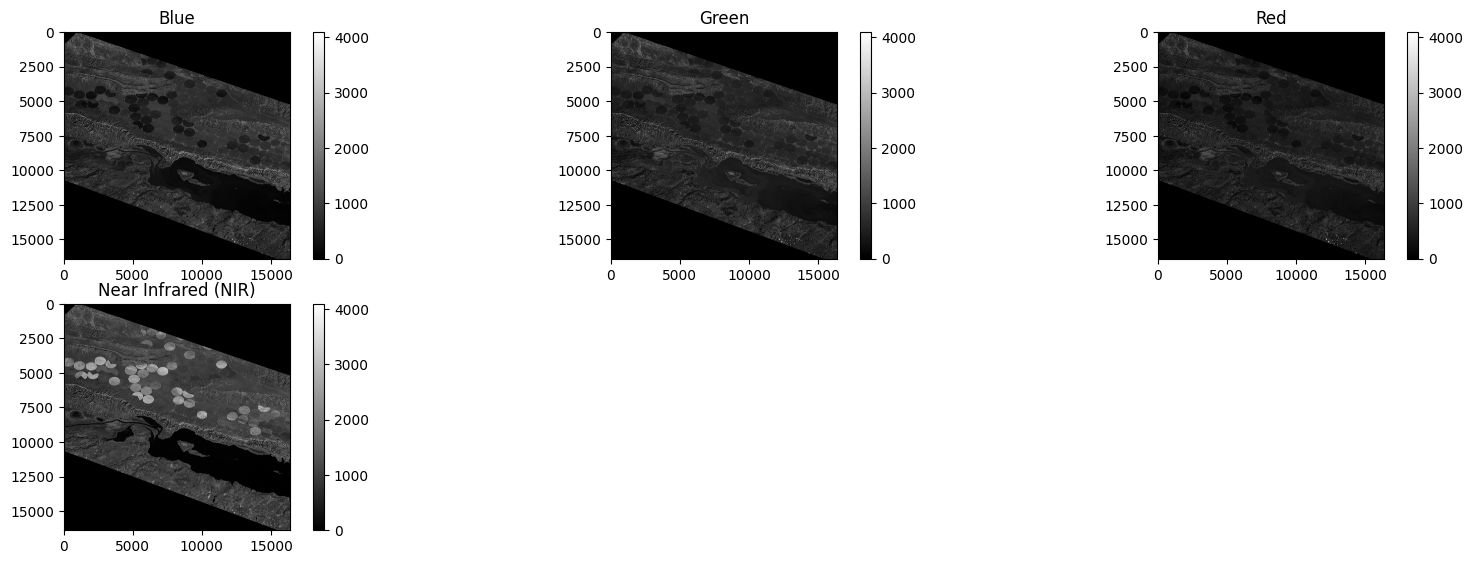

In [5]:
plt.figure(figsize = (20,10))
plt.subplot(331); plt.imshow(ds.GetRasterBand(1).ReadAsArray()); plt.title("Blue"); plt.colorbar();
plt.subplot(332); plt.imshow(ds.GetRasterBand(2).ReadAsArray()); plt.title("Green"); plt.colorbar();
plt.subplot(333); plt.imshow(ds.GetRasterBand(3).ReadAsArray()); plt.title("Red"); plt.colorbar();
plt.subplot(334); plt.imshow(ds.GetRasterBand(4).ReadAsArray()); plt.title("Near Infrared (NIR)"); plt.colorbar()

In [6]:
def get_NDVI(ds):
    r = ds.GetRasterBand(3).ReadAsArray()
    nir = ds.GetRasterBand(4).ReadAsArray()
    ndvi = (nir - r)/(nir + r)
    ndvi = normalize255(ndvi)
    return ndvi

In [7]:
def normalize255(ndvi):
    ndvi = ndvi + 1
    ndvi = (ndvi / 2) * 255
    return ndvi

In [8]:
def get_NDVI_mask(ndvi):
    _, mask = cv2.threshold(ndvi, 200, 255, cv2.THRESH_BINARY)
    return mask

In [9]:
def percent_forest(mask):
    c = cv2.countNonZero(mask)
    t = mask.shape[0] * mask.shape[1]
    return round((c / t) * 100, 4)

In [10]:
def plot_NDVI(path):
    ds = gdal.Open(path)
    ndvi = get_NDVI(ds)
    ndvi_mask = get_NDVI_mask(ndvi)

    year = path.split('.')[0][:4]
    fig = plt.figure(figsize = (20, 5))
    fig = plt.subplot(1, 2, 1)
    plot = plt.imshow(ndvi, cmap = "gray")
    plt.colorbar()
    plt.title(year + ": " + "NDVI") 
    plt.xticks([]), plt.yticks([])
    fig = plt.subplot(1, 2, 2)
    plot = plt.imshow(ndvi_mask, cmap = "gray"); 
    plt.title(str(percent_forest(ndvi_mask)) + "%") 
    plt.xticks([]), plt.yticks([])
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17136\1208458084.py:4: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - r)/(nir + r)


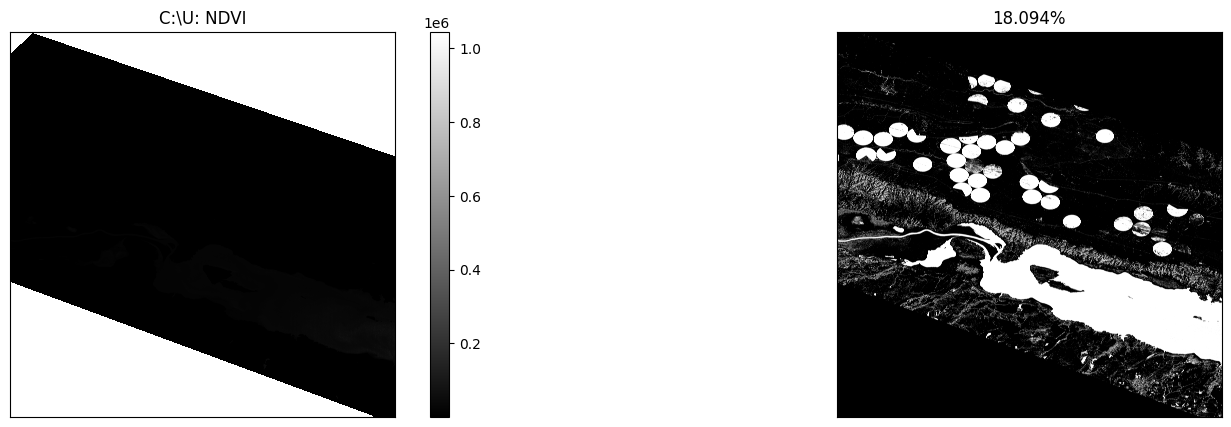

In [11]:
plot_NDVI(r"C:\Users\User\Documents\Azercosmos\IMG_SPOT6_PMS_202302140728244_ORT_AKWOI-00082569_R1C1.TIF")

C:\Users\User\AppData\Local\Temp\ipykernel_17136\1208458084.py:4: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - r)/(nir + r)


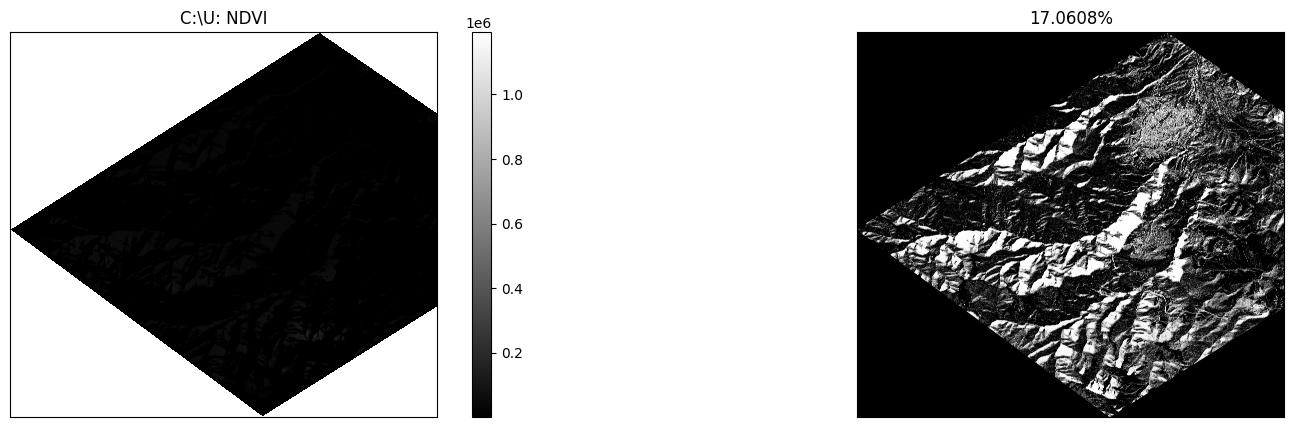

In [14]:
plot_NDVI(r"C:\Users\User\Documents\Azercosmos\IMG_SPOT6_PMS_202301070722135_ORT_AKWOI-00082571_R1C1.TIF")